# Modelo de Vibraciones

El modelo mas simple de vibracion tiene la siguiente forma
$$\begin{cases} u''+\omega^2 u=0  & t\in(0,T],  \\ u(0)=I,\\ u'(0)=0.\end{cases}$$
Aqui, $\omega$  e $I$ son constantes dadas. 

La solucion exacta es $u(t)=I\cos(\omega t)$.

Una implimentacion con diferencias finitas para la resolucion numerica de este modelo es la siguiente:

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Funcion que resuelve numericamente la edo mediante diferencias finitas
def solver(I,w,dt,T): 
    dt = float(dt)
    N = int(round(T / dt))
    u = np.zeros(N+1) # solucion
    t = np.linspace(0, N*dt, N+1) # discretizacion temporal

    u[0] = I
    u[1] = u[0] - 0.5*dt**2*w**2*u[0]

    for n in range(1, N):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n]
    return u, t

In [3]:
# solucion exacta
def u_exact(t,I,w):
    return I*np.cos(w*t)

In [4]:
# funcion que muestra la comparacion entre la solucion numerica y la exacta
def visualize(u, t, I, w):
    plt.figure(figsize=(18,8))
    plt.plot(t, u, 'r--o')
    t_fine = np.linspace(0, t[-1], 1001) # una malla muy fina para la solucion exacta
    u_e = u_exact(t_fine, I, w)
    plt.plot(t_fine, u_e, 'b-')
    plt.legend(['numerical', 'exact'], loc='upper left')
    plt.xlabel('t')
    plt.ylabel('u')
    dt = t[1] - t[0]
    plt.title('dt=%g' % dt)
    umin = 1.2*u.min(); umax = -umin
    plt.axis([t[0], t[-1], umin, umax])
    #plt.savefig('tmp1.png'); plt.savefig('tmp1.pdf')
    plt.show()

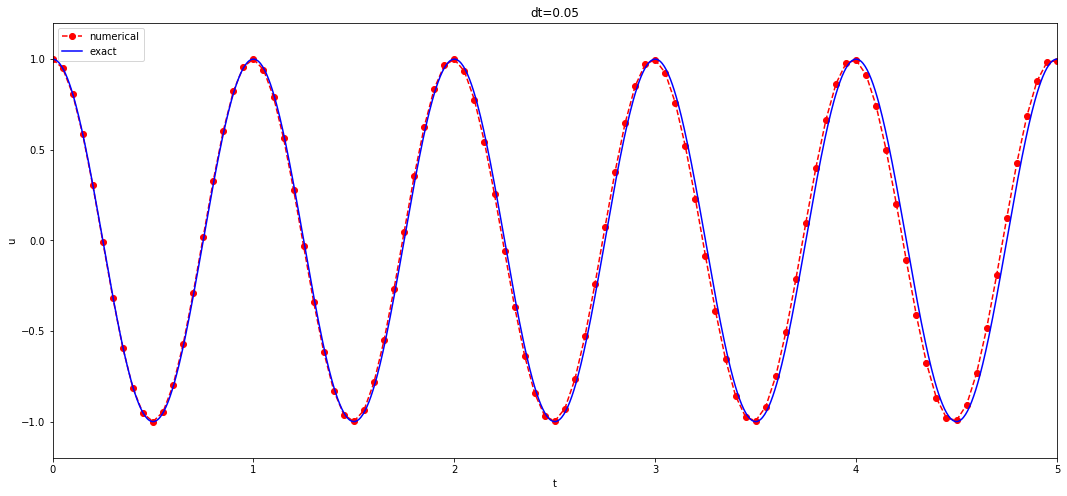

In [5]:
I = 1
w = 2*np.pi
dt = 0.05
num_periods = 5
P = 2*np.pi/w # un periodo
T = P*num_periods
u, t = solver(I, w, dt, T)
visualize(u, t, I, w)

## Tasa de Convergencia

In [6]:
def convergence_rates(m, solver_function, num_periods=8):
    """
    Retorna la estimacion empirica m-1de la tasa de convergencia
    basada en m simulaciones, donde el tamano de paso es reducido a la mitad
    para cada simulacion.
    solver_function(I, w, dt, T) resuelve cada problema, donde T
    esta basado sobre la simulacion para num_periods periodos.
    """
    from math import pi
    w = 0.35; I = 0.3       # escogemos valores
    P = 2*pi/w              # periodo
    dt = P/30               # 30 pasos en el tiempo por perioro 2*pi/w
    T = P*num_periods

    dt_values = []
    E_values = []
    for i in range(m):
        u, t = solver_function(I, w, dt, T)
        u_e = u_exact(t, I, w)
        E = np.sqrt(dt*np.sum((u_e-u)**2))
        dt_values.append(dt)
        E_values.append(E)
        dt = dt/2

    r = [np.log(E_values[i-1]/E_values[i])/
         np.log(dt_values[i-1]/dt_values[i])
         for i in range(1, m, 1)]
    return r

In [7]:
def test_convergence_rates():
    r = convergence_rates(m=5, solver_function=solver, num_periods=8)
    # Aceptar tasa a 1 decimal
    tol = 0.1
    assert abs(r[-1] - 2.0) < tol